In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


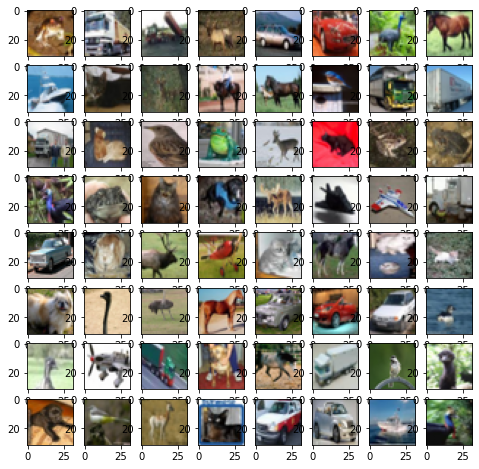

In [6]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()

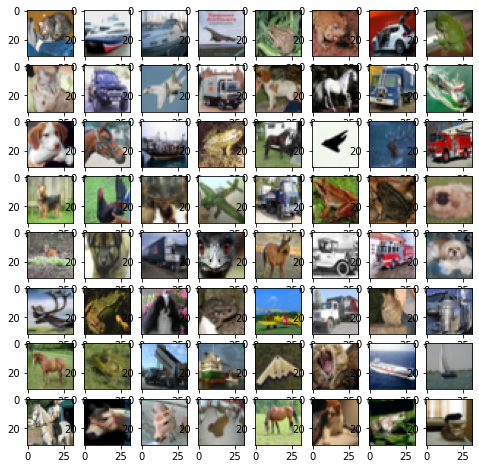

In [7]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_test[i],cmap=plt.cm.bone)
plt.show()

In [8]:
images_train.shape

(50000, 32, 32, 3)

In [9]:
# RESHAPING THE TRAININ ARRAY

import numpy as np
x_train = images_train
y_train = cls_train
x_train= x_train.reshape(50000,3072)
x_train.shape

(50000, 3072)

In [10]:
#RESHAPING THE TESTING ARRAY

x_test = images_test
y_test= cls_test
x_test = x_test.reshape(10000, 3072)
x_test.shape

(10000, 3072)

In [11]:
#len(cls_train),len(cls_test)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time

In [12]:
pca=PCA()
pca.fit(x_train)


PCA()

In [13]:
#finding the optimum value of K
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total<0.99:
    current_variance+=pca.explained_variance_[k]
    k+=1
k

658

In [14]:
# fitting the alogorithm
pca=PCA(n_components=k,whiten=True)
x_transformed_data=pca.fit_transform(x_train)
x_transformed_data.shape

(50000, 658)

In [15]:
x_approx=pca.inverse_transform(x_transformed_data)

In [16]:
x_approx.shape

(50000, 3072)

In [17]:
test_transform_data = pca.transform(x_test)
test_transform_data.shape

(10000, 658)

In [18]:
# spliting the dataset
x_train1,x_test1,y_train1,y_test1= train_test_split(x_transformed_data,y_train)
x_train1.shape

(37500, 658)

In [23]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = svm.SVC()
grid = { 'C' : [1e2,1e3,5e3,1e4,1e5],
         'gamma' : [1e-3,5e-4,1e-4,5e-3]}
abc = GridSearchCV(clf,grid)
abc.fit(x_train1,y_train1)
abc.best_estimator_
#clf = svm.SVC()
#svc.fit(x_train_pca, y_train)
#clf.fit(x_train1,y_train1)

In [21]:
#from sklearn import svm
#clf = svm.SVC()
#clf.fit(cls_train,labels_train.reshape(-1,1))

In [22]:
#Y_pred = clf.predict(cls_test)